# FERNANDEZ

## Carga y limpieza de datos.

In [65]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.subplots as plt

In [66]:
dff = "https://raw.githubusercontent.com/EnzoFernandez92/facturas/main/lectura%20timelapse%20fernandez.csv"

In [67]:
fernandez = pd.read_csv(dff)
fernandez

,FECHA,HORA,MINUTOS,N ABEJAS/ VISITA,N MOSCAS / VISITA,TEMPERATURA,ESPECIE,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,6/11/2020,15,21,1,0,39,ABEJA,NaN,NaN,NaN,NaN
1,6/11/2020,15,22,1,0,38,ABEJA,NaN,NaN,NaN,NaN
2,6/11/2020,15,22,1,0,38,ABEJA,NaN,NaN,NaN,NaN
3,6/11/2020,15,23,2,0,38,ABEJA,NaN,NaN,NaN,NaN
4,6/11/2020,15,23,1,0,38,ABEJA,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3420,25/11/2020,10,26,0,0,28,ABEJA,NaN,NaN,NaN,NaN
3421,25/11/2020,11,7,1,0,27,ABEJA,NaN,NaN,NaN,NaN
3422,25/11/2020,11,7,1,0,27,ABEJA,NaN,NaN,NaN,NaN
3423,1/12/2020,11,7,0,0,27,ABEJA,NaN,NaN,NaN,NaN


In [68]:
fernandez.columns

Index(['FECHA', 'HORA', 'MINUTOS', 'N  ABEJAS/ VISITA', 'N MOSCAS / VISITA',
       'TEMPERATURA', 'ESPECIE', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10'],
      dtype='object')

In [69]:
fernandez["PRODUCTOR"]= "Fernandez"
fernandez.rename(columns = {"N  ABEJAS/ VISITA" : "ABEJAS/VISITA" , "N MOSCAS / VISITA" : "MOSCAS/VISITA" , "especie" : "ESPECIE"}, inplace = True)
fernandez.drop(columns = ["Unnamed: 7" , "Unnamed: 8" , "Unnamed: 9" , "Unnamed: 10" ], inplace= True)
fernandez

,FECHA,HORA,MINUTOS,ABEJAS/VISITA,MOSCAS/VISITA,TEMPERATURA,ESPECIE,PRODUCTOR
0,6/11/2020,15,21,1,0,39,ABEJA,Fernandez
1,6/11/2020,15,22,1,0,38,ABEJA,Fernandez
2,6/11/2020,15,22,1,0,38,ABEJA,Fernandez
3,6/11/2020,15,23,2,0,38,ABEJA,Fernandez
4,6/11/2020,15,23,1,0,38,ABEJA,Fernandez
...,...,...,...,...,...,...,...,...
3420,25/11/2020,10,26,0,0,28,ABEJA,Fernandez
3421,25/11/2020,11,7,1,0,27,ABEJA,Fernandez
3422,25/11/2020,11,7,1,0,27,ABEJA,Fernandez
3423,1/12/2020,11,7,0,0,27,ABEJA,Fernandez


In [70]:
fernandez["FECHA"] = pd.to_datetime(fernandez.FECHA, dayfirst = True)

In [71]:
fernandez.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3425 entries, 0 to 3424
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   FECHA          3425 non-null   datetime64[ns]
 1   HORA           3425 non-null   int64         
 2   MINUTOS        3425 non-null   int64         
 3   ABEJAS/VISITA  3425 non-null   int64         
 4   MOSCAS/VISITA  3425 non-null   int64         
 5   TEMPERATURA    3425 non-null   int64         
 6   ESPECIE        3425 non-null   object        
 7   PRODUCTOR      3425 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 214.2+ KB


In [72]:
fernandez["HORARIO"] = fernandez[["HORA" , "MINUTOS"]].apply(lambda x : ":" .join(str(value) for value in x ), axis = 1)

In [73]:
fernandez["HORARIO"] = pd.to_datetime(fernandez["HORARIO"], format="%H:%M")

In [74]:
fernandez.drop( columns = ["HORA" , "MINUTOS"], inplace = True)

In [75]:
fernandez = fernandez[fernandez["FECHA"] <= "2020-11-25"]

In [76]:
fernandez = fernandez.iloc[:,[5,0,6,1,2,4,3]]
fernandez

,PRODUCTOR,FECHA,HORARIO,ABEJAS/VISITA,MOSCAS/VISITA,ESPECIE,TEMPERATURA
0,Fernandez,2020-11-06,1900-01-01 15:21:00,1,0,ABEJA,39
1,Fernandez,2020-11-06,1900-01-01 15:22:00,1,0,ABEJA,38
2,Fernandez,2020-11-06,1900-01-01 15:22:00,1,0,ABEJA,38
3,Fernandez,2020-11-06,1900-01-01 15:23:00,2,0,ABEJA,38
4,Fernandez,2020-11-06,1900-01-01 15:23:00,1,0,ABEJA,38
...,...,...,...,...,...,...,...
3418,Fernandez,2020-11-24,1900-01-01 19:32:00,1,0,ABEJA,39
3419,Fernandez,2020-11-24,1900-01-01 19:51:00,0,1,MOSCA,35
3420,Fernandez,2020-11-25,1900-01-01 10:26:00,0,0,ABEJA,28
3421,Fernandez,2020-11-25,1900-01-01 11:07:00,1,0,ABEJA,27


## Gráficos

In [77]:
dia = fernandez.groupby("FECHA").agg({ "ABEJAS/VISITA" : "sum" , "MOSCAS/VISITA" : "sum" , "TEMPERATURA" : "mean"}).reset_index(drop = False)
dia

,FECHA,ABEJAS/VISITA,MOSCAS/VISITA,TEMPERATURA
0,2020-11-06,212,5,40.393782
1,2020-11-07,549,0,37.334764
2,2020-11-08,543,13,36.391489
3,2020-11-09,290,1,36.274809
4,2020-11-10,212,0,36.010101
5,2020-11-11,274,15,36.316981
6,2020-11-12,179,169,27.556575
7,2020-11-13,140,29,33.909091
8,2020-11-14,14,76,25.822222
9,2020-11-15,151,1,33.697987


In [78]:
dia_fernandez_graf_bar = px.bar(dia,
                            x = "FECHA",
                            y= ["ABEJAS/VISITA" , "MOSCAS/VISITA"],
                            template = "gridon",
                            title = "Visita de polinizadores por día")
dia_fernandez_graf_bar.show()

In [79]:
dia_fernandez_graf_line = px.line(dia,
                                  x ="FECHA",
                                  y= "TEMPERATURA")
dia_fernandez_graf_line.show()

In [80]:
from plotly import colors
import plotly.express as px
from plotly.subplots import make_subplots

dia_fernandez_graf = make_subplots(specs =[[{"secondary_y" : True}]])

dia_fernandez_graf.add_trace(
    px.bar(dia,
           color_discrete_sequence= ["lightgreen"],
           x = "FECHA",
           y= "MOSCAS/VISITA").data[0],
           secondary_y = False
)

dia_fernandez_graf.add_trace(
    px.bar(dia,
           color_discrete_sequence= ["darkolivegreen"],
           x = "FECHA",
           y= "ABEJAS/VISITA").data[0],
           secondary_y = False
)

dia_fernandez_graf.add_trace(
    px.line(dia,
            color_discrete_sequence= ["black"],
            x ="FECHA",
            y= ["TEMPERATURA"]).data[0],
            secondary_y = True
)


dia_fernandez_graf.show()

In [81]:
hora = fernandez.groupby(fernandez["HORARIO"].dt.hour).agg({ "ABEJAS/VISITA" : "sum" , "MOSCAS/VISITA" : "sum" , "TEMPERATURA" : "mean"}).reset_index(drop = False)
hora

,HORARIO,ABEJAS/VISITA,MOSCAS/VISITA,TEMPERATURA
0,7,9,179,18.074713
1,8,39,229,24.939394
2,9,119,2,29.964602
3,10,171,1,31.845679
4,11,240,5,32.610619
5,12,273,1,34.949020
6,13,300,5,35.868794
7,14,314,7,37.094077
8,15,367,31,37.659155
9,16,375,55,36.845178


In [82]:
hora_fernandez_graf = make_subplots(specs =[[{"secondary_y" : True}]])

hora_fernandez_graf.add_trace(
    px.bar(hora,
           color_discrete_sequence= ["lightgreen"],
           x = "HORARIO",
           y= "MOSCAS/VISITA").data[0],
           secondary_y = False
)

hora_fernandez_graf.add_trace(
    px.bar(hora,
           color_discrete_sequence= ["darkolivegreen"],
           x = "HORARIO",
           y= "ABEJAS/VISITA").data[0],
           secondary_y = False
)

hora_fernandez_graf.add_trace(
    px.line(hora,
            color_discrete_sequence= ["black"],
            x ="HORARIO",
            y= ["TEMPERATURA"]).data[0],
            secondary_y = True
)


hora_fernandez_graf

In [83]:
!pip install sweetviz

                                             |          | [  0%]   00:00 -> (? left)


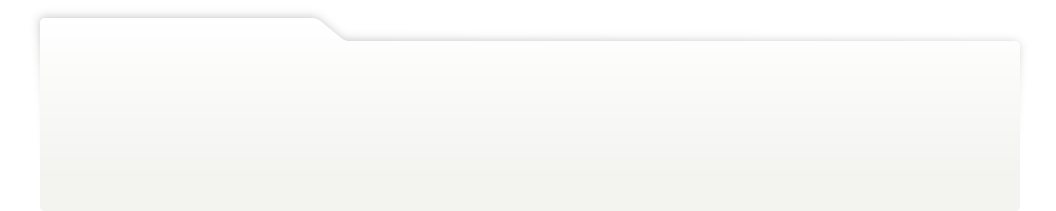
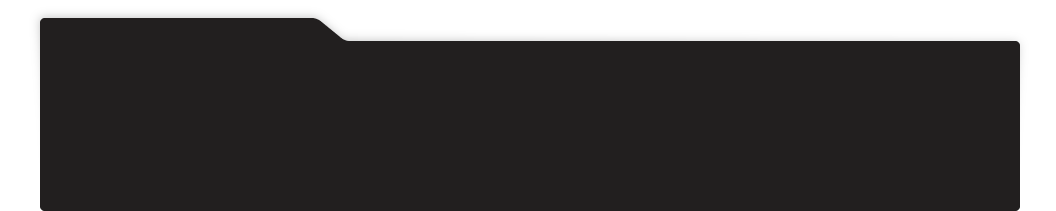
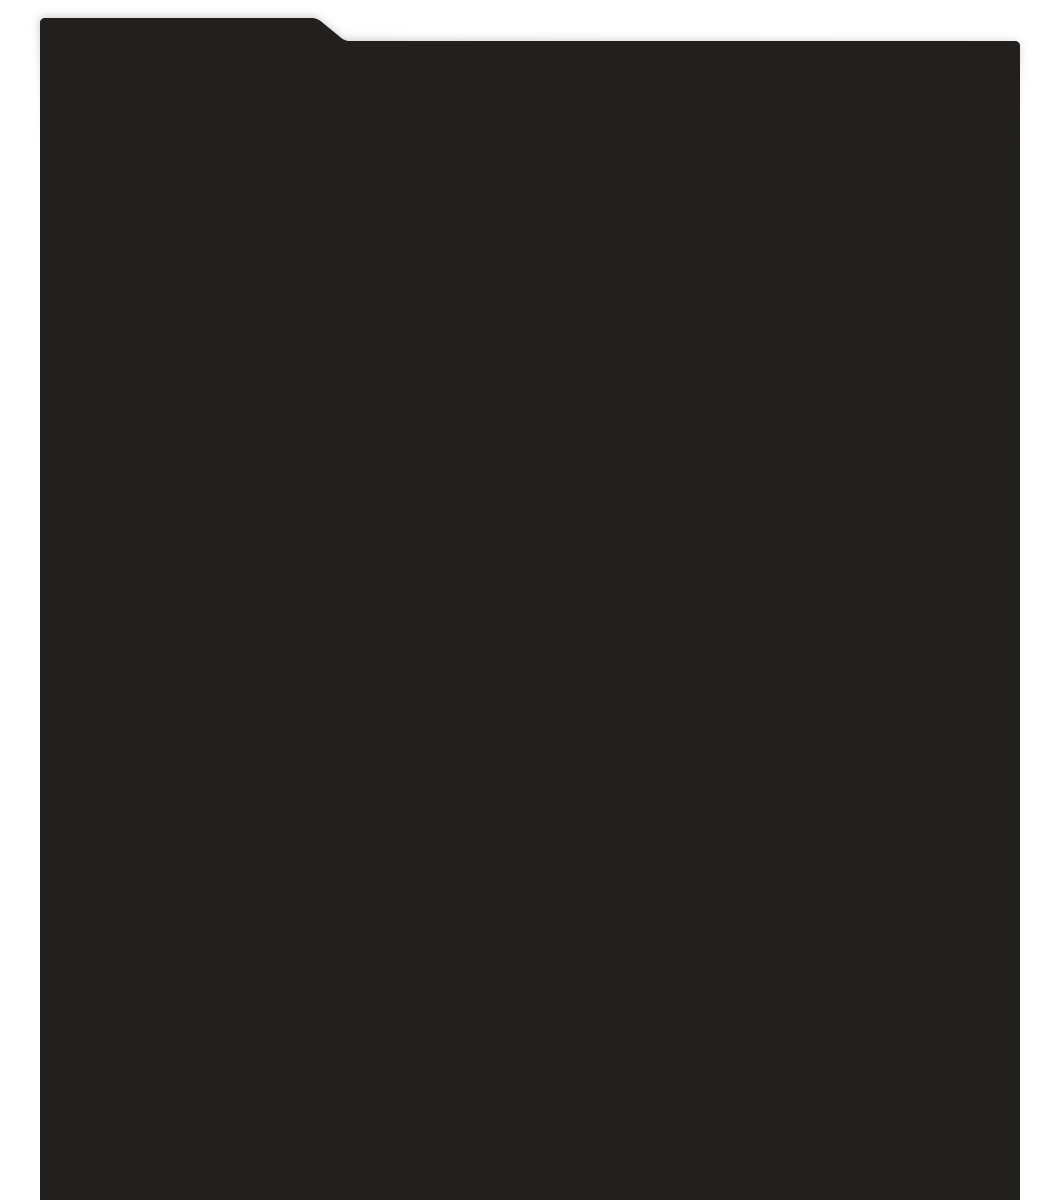
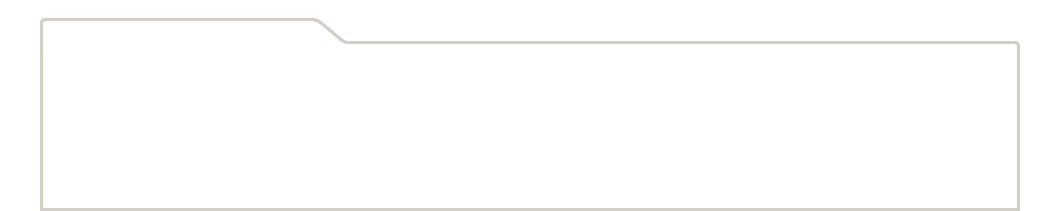
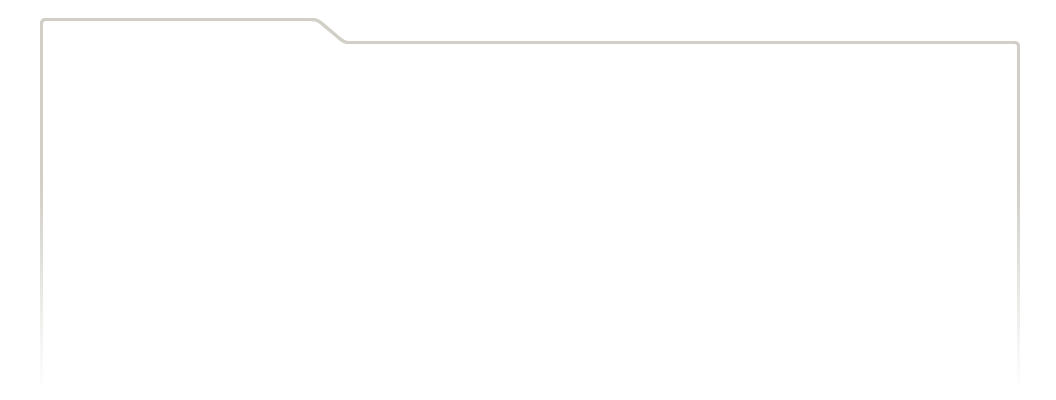
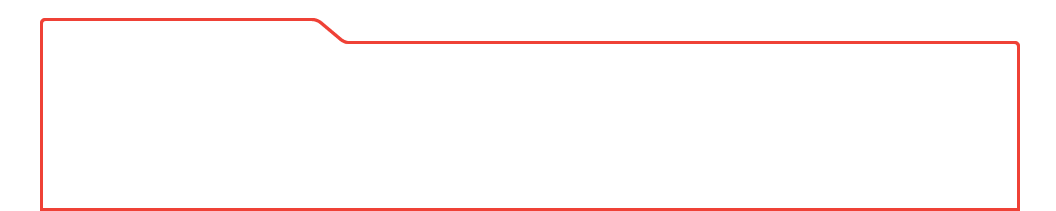
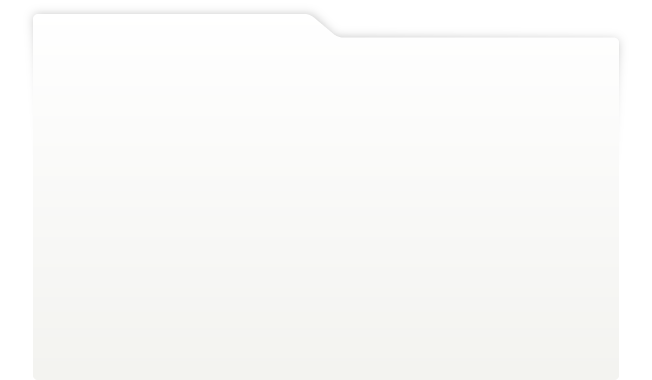
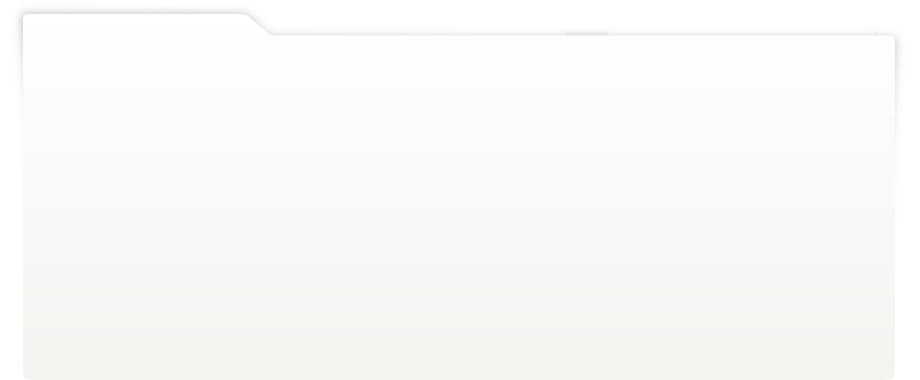
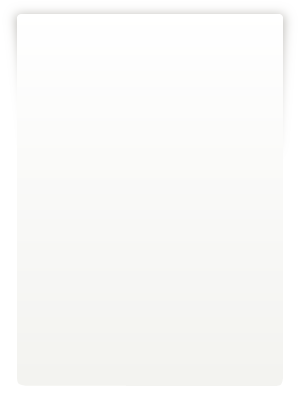
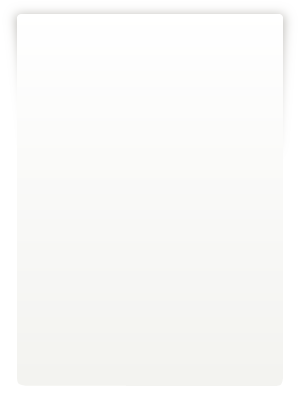
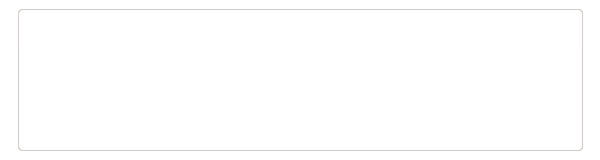
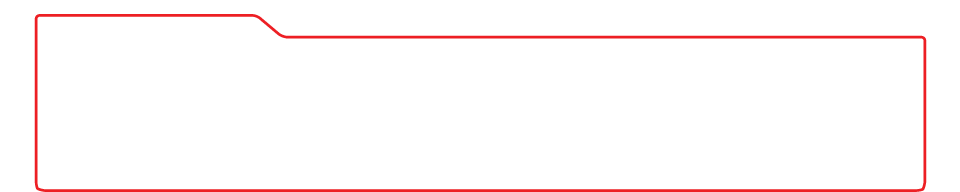
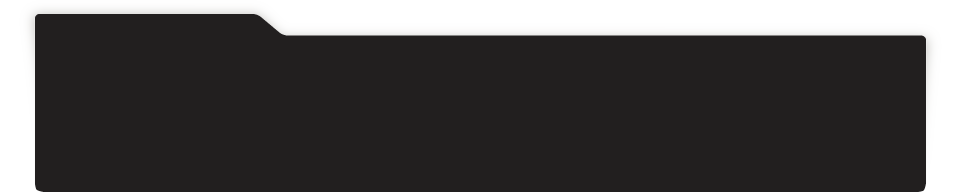
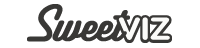
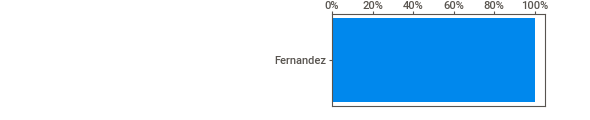
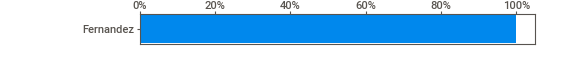
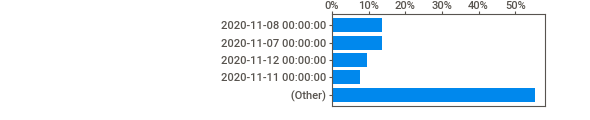
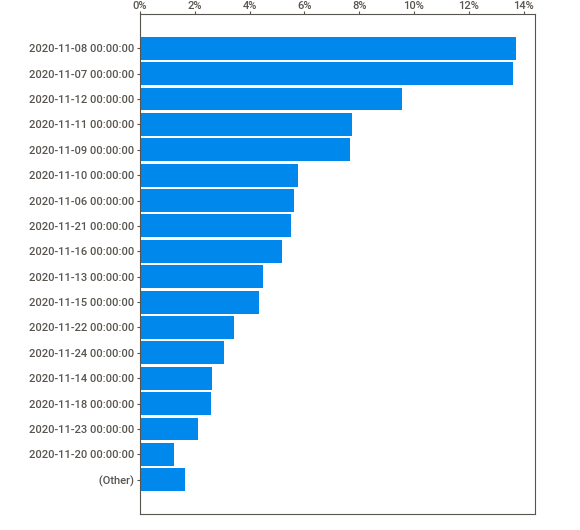
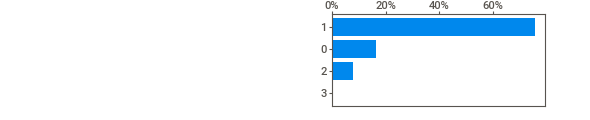
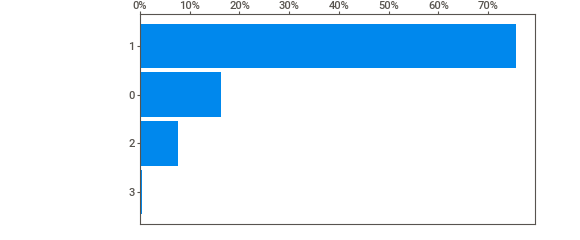
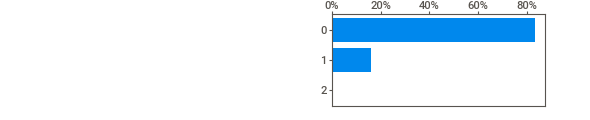
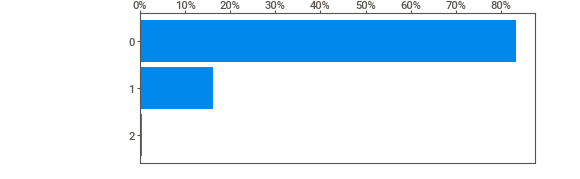
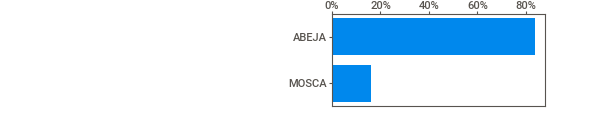
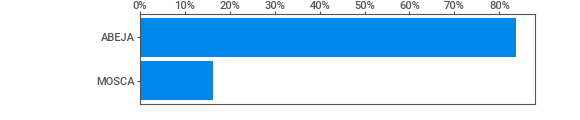
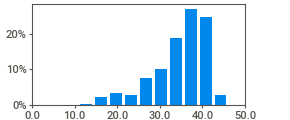
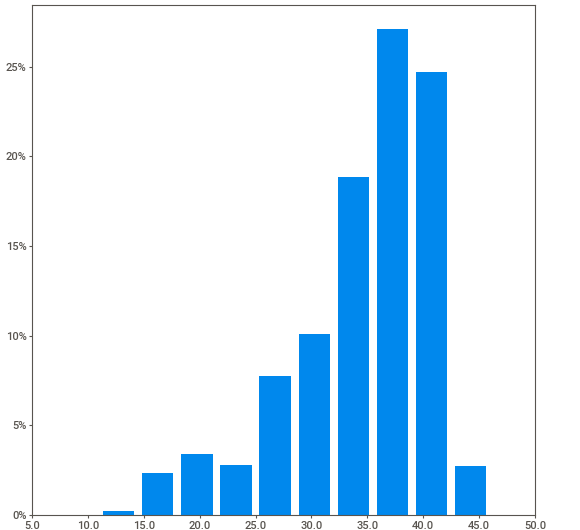
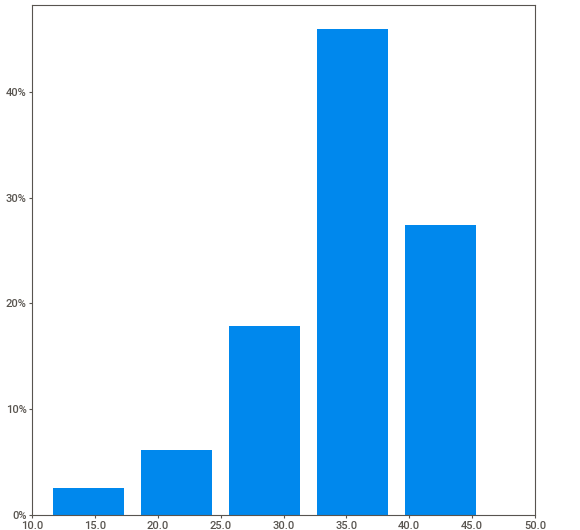
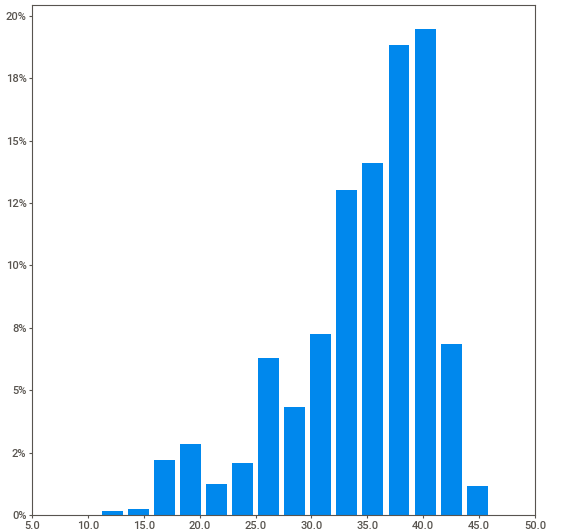
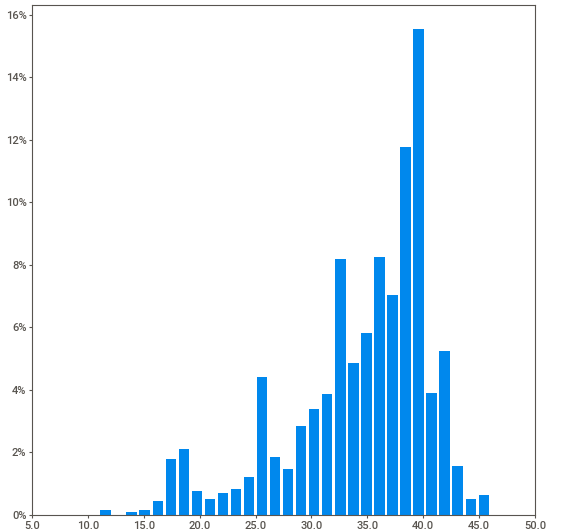
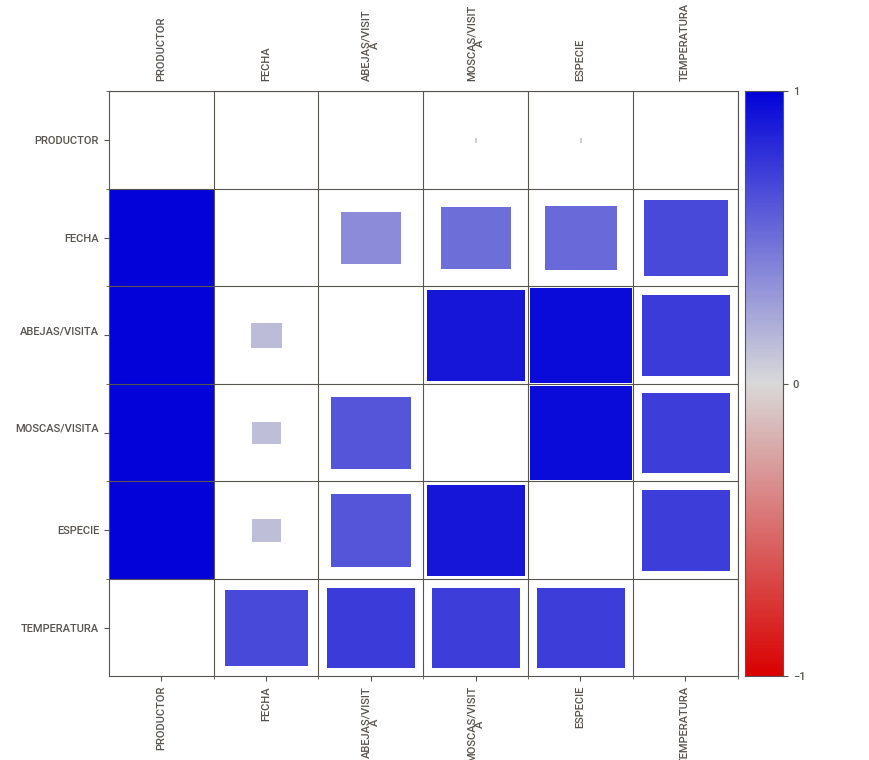
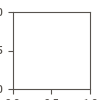

In [84]:
import sweetviz as sv
report = sv.analyze(fernandez)
report.show_notebook()

# SANCHEZ

## Carga y limpieza de datos.


###Importacion de modulos.



In [85]:
 import numpy as np
 import pandas as pd
 import plotly.express as px

### Carga de datos


In [86]:
dfs = "https://raw.githubusercontent.com/EnzoFernandez92/facturas/main/lectura%20timelapse%20sanchez.csv"

In [87]:
sanchez = pd.read_csv(dfs)
sanchez

,FECHA,HORA,MINUTOS,N ABEJAS/ VISITA,N POLINIZADORES / VISITA,TEMPERATURA,ESPECIE
0,4/11/2020,9,6,1,0,29,ABEJA
1,4/11/2020,9,54,1,0,33,ABEJA
2,4/11/2020,9,54,0,0,33,ABEJA
3,4/11/2020,9,55,1,0,33,ABEJA
4,4/11/2020,10,55,1,0,37,ABEJA
...,...,...,...,...,...,...,...
318,14/11/2020,10,0,0,1,32,MOSCA
319,14/11/2020,10,33,1,0,32,ABEJA
320,14/11/2020,10,33,1,0,32,ABEJA
321,14/11/2020,10,34,1,0,32,ABEJA


### Transformacion y limpieza de datos

In [88]:
sanchez.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   FECHA                     323 non-null    object
 1   HORA                      323 non-null    int64 
 2   MINUTOS                   323 non-null    int64 
 3   N  ABEJAS/ VISITA         323 non-null    int64 
 4   N POLINIZADORES / VISITA  323 non-null    int64 
 5   TEMPERATURA               323 non-null    int64 
 6   ESPECIE                   323 non-null    object
dtypes: int64(5), object(2)
memory usage: 17.8+ KB


In [89]:
sanchez.describe( )

,HORA,MINUTOS,N ABEJAS/ VISITA,N POLINIZADORES / VISITA,TEMPERATURA
count,323.000000,323.000000,323.000000,323.000000,323.00000
mean,12.421053,28.603715,0.712074,0.291022,35.96904
std,3.380037,15.390494,0.460296,0.454938,6.41032
min,7.000000,0.000000,0.000000,0.000000,17.00000
25%,10.000000,17.000000,0.000000,0.000000,34.00000
50%,11.000000,27.000000,1.000000,0.000000,36.00000
75%,15.000000,42.000000,1.000000,1.000000,41.00000
max,19.000000,59.000000,2.000000,1.000000,46.00000


In [90]:
sanchez.describe( include = object)

,FECHA,ESPECIE
count,323,323
unique,11,11
top,11/11/2020,ABEJA
freq,106,230


In [91]:
sanchez.columns

Index(['FECHA', 'HORA', 'MINUTOS', 'N  ABEJAS/ VISITA',
       'N POLINIZADORES / VISITA', 'TEMPERATURA', 'ESPECIE'],
      dtype='object')

In [92]:
sanchez["PRODUCTOR"] = "Sanchez"
sanchez

,FECHA,HORA,MINUTOS,N ABEJAS/ VISITA,N POLINIZADORES / VISITA,TEMPERATURA,ESPECIE,PRODUCTOR
0,4/11/2020,9,6,1,0,29,ABEJA,Sanchez
1,4/11/2020,9,54,1,0,33,ABEJA,Sanchez
2,4/11/2020,9,54,0,0,33,ABEJA,Sanchez
3,4/11/2020,9,55,1,0,33,ABEJA,Sanchez
4,4/11/2020,10,55,1,0,37,ABEJA,Sanchez
...,...,...,...,...,...,...,...,...
318,14/11/2020,10,0,0,1,32,MOSCA,Sanchez
319,14/11/2020,10,33,1,0,32,ABEJA,Sanchez
320,14/11/2020,10,33,1,0,32,ABEJA,Sanchez
321,14/11/2020,10,34,1,0,32,ABEJA,Sanchez


In [93]:
sanchez.rename(columns= {'N  ABEJAS/ VISITA' : 'ABEJAS/VISITA', 'N POLINIZADORES / VISITA' : 'POLINIZADORES/VISITA'} , inplace = True)
sanchez

,FECHA,HORA,MINUTOS,ABEJAS/VISITA,POLINIZADORES/VISITA,TEMPERATURA,ESPECIE,PRODUCTOR
0,4/11/2020,9,6,1,0,29,ABEJA,Sanchez
1,4/11/2020,9,54,1,0,33,ABEJA,Sanchez
2,4/11/2020,9,54,0,0,33,ABEJA,Sanchez
3,4/11/2020,9,55,1,0,33,ABEJA,Sanchez
4,4/11/2020,10,55,1,0,37,ABEJA,Sanchez
...,...,...,...,...,...,...,...,...
318,14/11/2020,10,0,0,1,32,MOSCA,Sanchez
319,14/11/2020,10,33,1,0,32,ABEJA,Sanchez
320,14/11/2020,10,33,1,0,32,ABEJA,Sanchez
321,14/11/2020,10,34,1,0,32,ABEJA,Sanchez


In [94]:
sanchez = sanchez.iloc[: , [7,0,1,2,3,4,5,6] ]

In [95]:
sanchez

,PRODUCTOR,FECHA,HORA,MINUTOS,ABEJAS/VISITA,POLINIZADORES/VISITA,TEMPERATURA,ESPECIE
0,Sanchez,4/11/2020,9,6,1,0,29,ABEJA
1,Sanchez,4/11/2020,9,54,1,0,33,ABEJA
2,Sanchez,4/11/2020,9,54,0,0,33,ABEJA
3,Sanchez,4/11/2020,9,55,1,0,33,ABEJA
4,Sanchez,4/11/2020,10,55,1,0,37,ABEJA
...,...,...,...,...,...,...,...,...
318,Sanchez,14/11/2020,10,0,0,1,32,MOSCA
319,Sanchez,14/11/2020,10,33,1,0,32,ABEJA
320,Sanchez,14/11/2020,10,33,1,0,32,ABEJA
321,Sanchez,14/11/2020,10,34,1,0,32,ABEJA


In [98]:
import nbformat as nbf

# Cargamos el cuaderno de Colab.
nb = nbf.read(open("Lectura Abejas.ipynb", "r"), nbf.NO_CONVERT)

# Convertimos el cuaderno en formato Markdown.
markdown_report = nbf.write(nb, nbf.MarkdownExporter())

# Imprimimos el informe.
print(markdown_report)

FileNotFoundError: ignored